In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import logging

logging.getLogger("prophet").setLevel(logging.ERROR)
logging.getLogger("cmdstanpy").disabled = True

from time_series_gpt.models.Monte_Carlo.prophet import ProphetMeta
from data_loading_finance.loading_data import LoadingData
from ts_tools.tools import tools

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Getting info for 8 tickers...
Too many unique ids to plot: 8. We will plot the first 5.


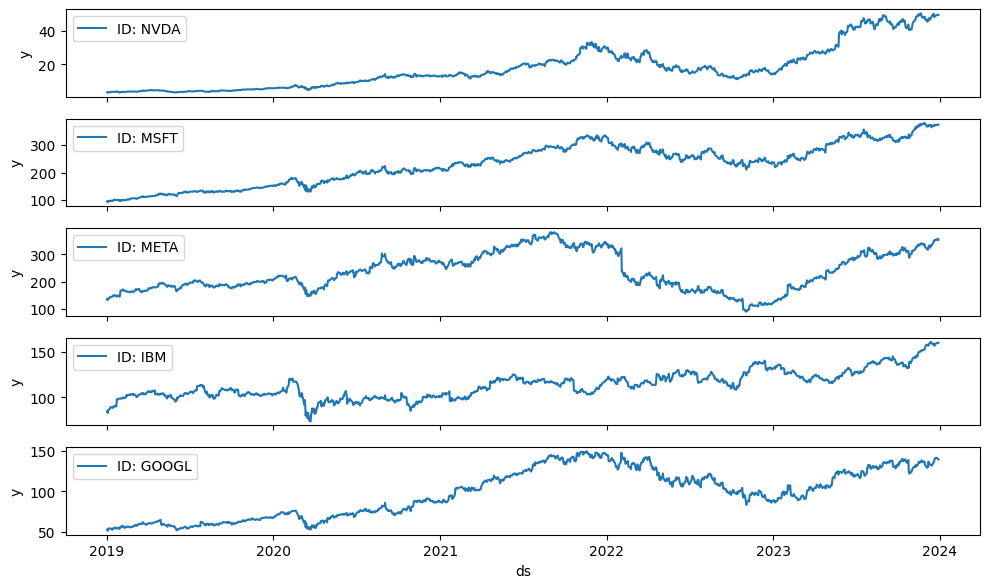

In [34]:
# Cargar datos y preprocesarlos
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'IBM', 'BTC-USD']
loader = LoadingData(tickers=tickers)
ts = loader.get_data(start_date='2019-01-01', end_date='2023-12-31')
info = loader.get_info_ticker()

ts_tools = tools()
ts = ts_tools.ts_prepartion(ts, 'Date', 'Adj Close')

# Graficar los datos
ts_tools.plot_ts(ts)

In [35]:
prophet = False

horizon= 30
freq= 'D'

model = ProphetMeta (ts_data=ts)
model.train_and_evaluate()
ts_forecast = model.predict(horizon=horizon, freq=freq)
result_metric = model.get_results()

Processing NVDA...
Finished processing NVDA.
Processing MSFT...
Finished processing MSFT.
Processing META...
Finished processing META.
Processing IBM...
Finished processing IBM.
Processing GOOGL...
Finished processing GOOGL.
Processing BTC-USD...
Finished processing BTC-USD.
Processing AMZN...
Finished processing AMZN.
Processing AAPL...
Finished processing AAPL.


In [36]:
ts_forecast

,unique_id,ds,yhat,yhat_lower,yhat_upper
0,NVDA,2019-01-02,4.241421,2.603167,5.842922
1,NVDA,2019-01-03,4.206738,2.717378,5.748616
2,NVDA,2019-01-04,4.081709,2.610285,5.654496
3,NVDA,2019-01-07,3.840235,2.319491,5.400932
4,NVDA,2019-01-08,3.801767,2.326400,5.301235
...,...,...,...,...,...
1283,AAPL,2024-01-24,202.332271,195.885985,209.084354
1284,AAPL,2024-01-25,202.585463,196.044145,209.588795
1285,AAPL,2024-01-26,203.046047,196.453690,210.011035
1286,AAPL,2024-01-27,203.714477,197.261739,210.953887


In [37]:
result_metric

,unique_id,SMAPE Error,MAPE Error,Accuracy
0,NVDA,0.132474,0.125338,86.752571
0,MSFT,0.107243,0.105730,89.275688
0,META,0.199275,0.190597,80.072481
0,IBM,0.135398,0.136759,86.460193
0,GOOGL,0.138127,0.136670,86.187349
0,BTC-USD,0.348138,0.327556,65.186154
0,AMZN,0.112642,0.107136,88.735786
0,AAPL,0.182865,0.173931,81.713469


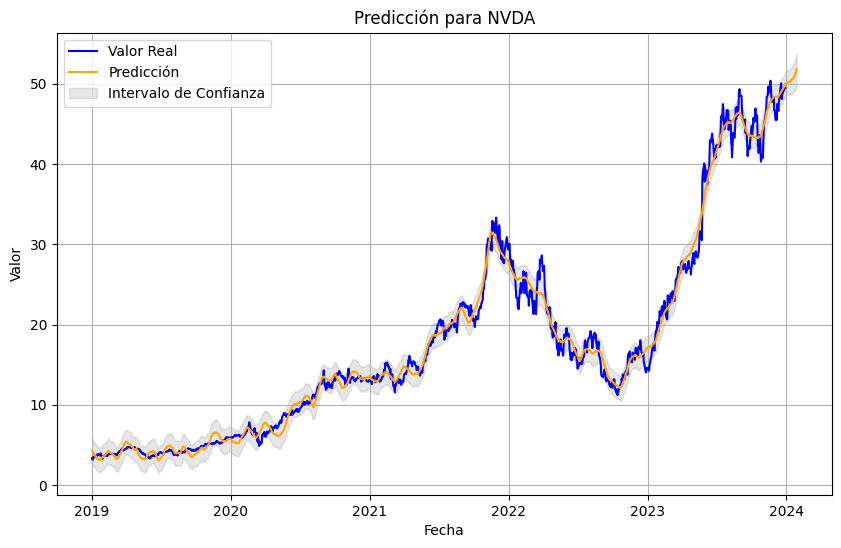

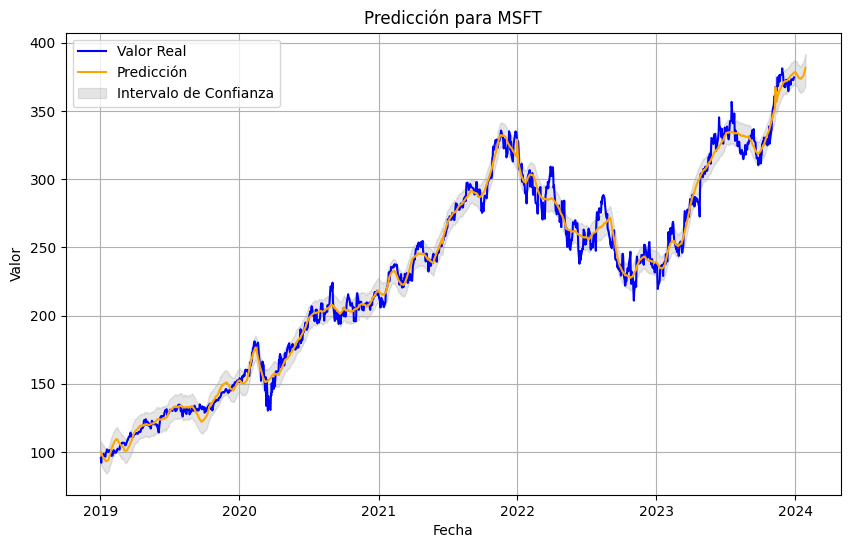

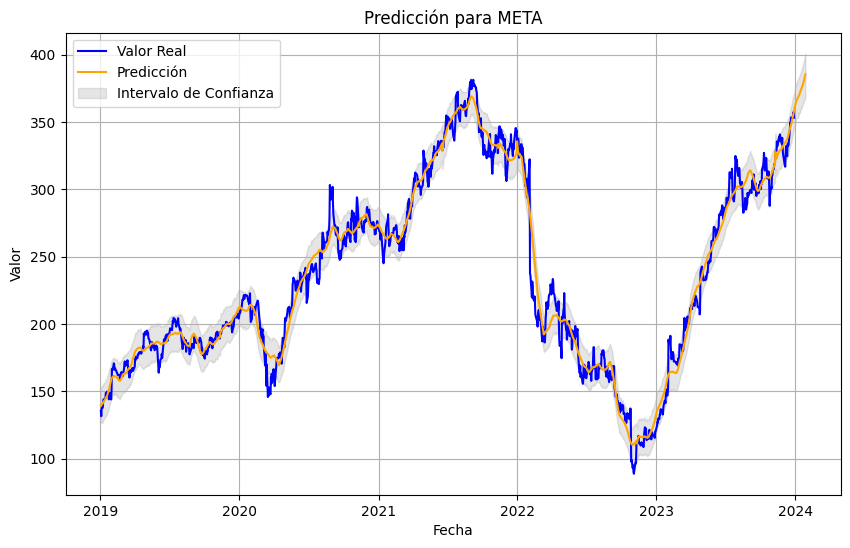

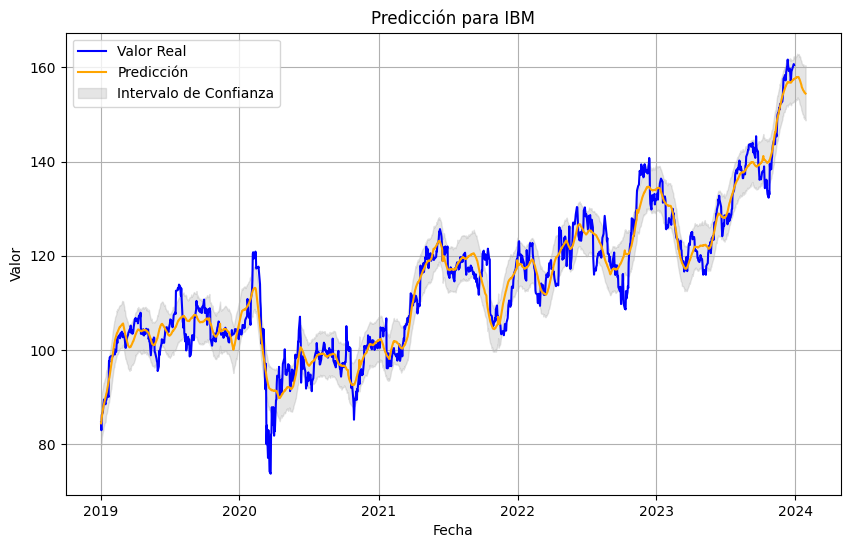

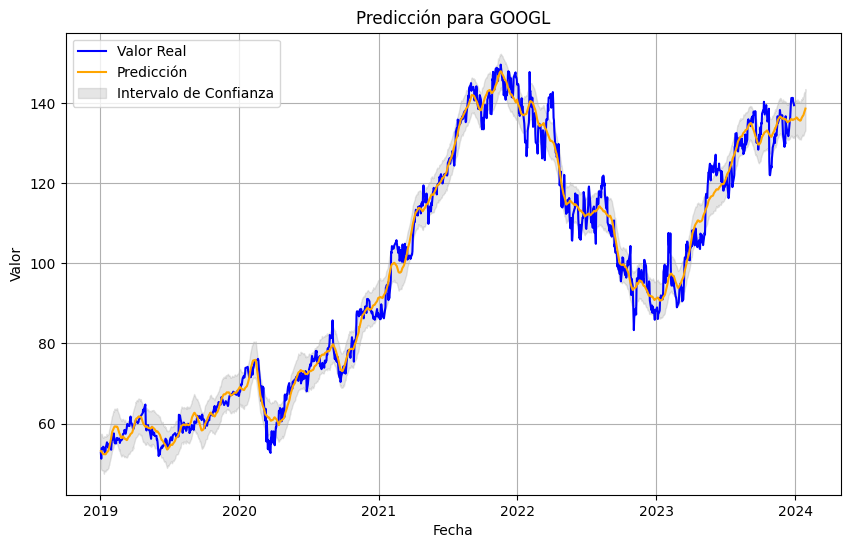

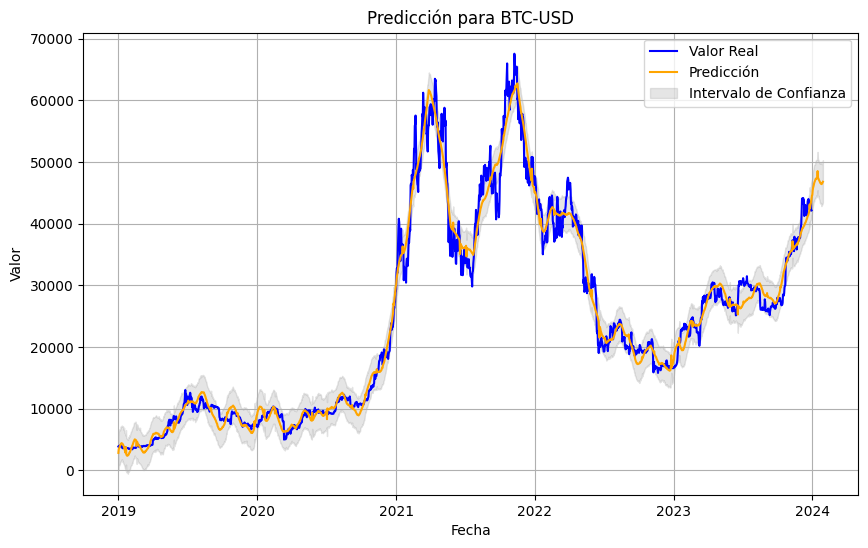

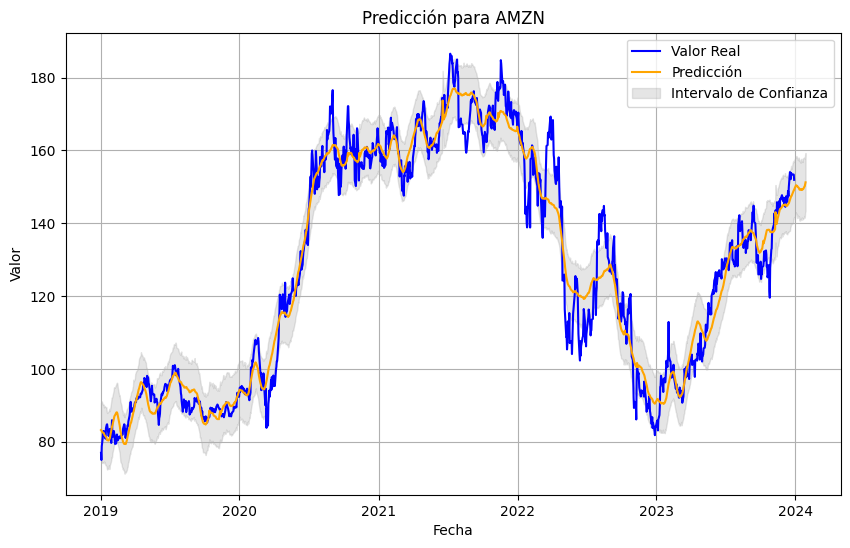

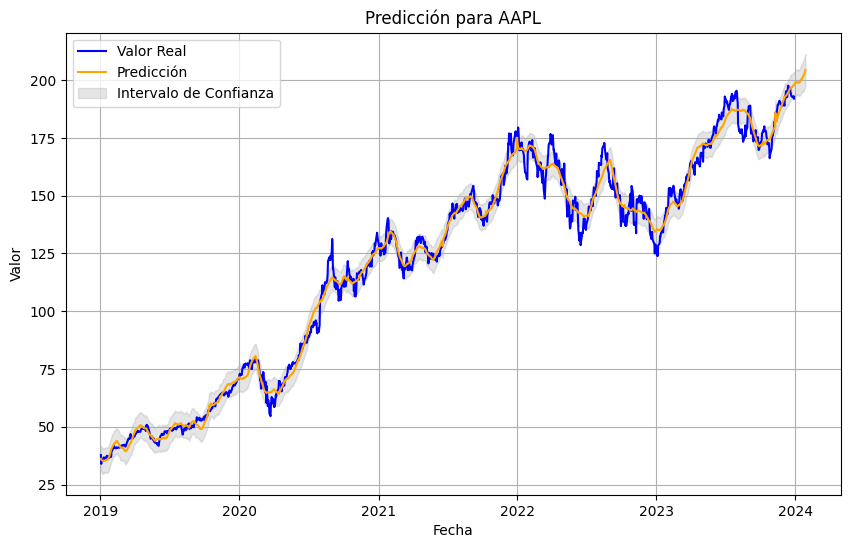

In [38]:
# Función para graficar el pronóstico junto con los valores reales
def plot_forecast(ts_data, ts_forecast):
    unique_ids = ts_forecast['unique_id'].unique()
    
    for unique_id in unique_ids:
        forecast_data = ts_forecast[ts_forecast['unique_id'] == unique_id]
        actual_data = ts_data[ts_data['unique_id'] == unique_id]
        
        plt.figure(figsize=(10, 6))
        
        # Graficar los valores reales
        plt.plot(actual_data['ds'], actual_data['y'], label='Valor Real', color='blue')
        
        # Graficar las predicciones
        plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Predicción', color='orange')
        
        # Rellenar el intervalo de confianza
        plt.fill_between(forecast_data['ds'], forecast_data['yhat_lower'], forecast_data['yhat_upper'], 
                         color='gray', alpha=0.2, label='Intervalo de Confianza')
        
        plt.title(f'Predicción para {unique_id}')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.legend()
        plt.grid(True)
        plt.show()
        
plot_forecast(ts, ts_forecast)